<a href="https://colab.research.google.com/github/kollerbud/House_price_predict/blob/master/House_price_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')

import os
import sys

print('pandas version {0}, numpy version {1}, Python version {2},matplotlib version {3}, seaborn version {4}'
      .format(pd.__version__, np.__version__, sys.version, matplotlib.__version__, sns.__version__))



pandas version 0.22.0, numpy version 1.14.6, Python version 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0],matplotlib version 3.0.2, seaborn version 0.7.1


In [2]:
train_url ='https://raw.githubusercontent.com/kollerbud/House_price_predict/master/train.csv'
test_url ='https://raw.githubusercontent.com/kollerbud/House_price_predict/master/test.csv'
df_train =pd.read_csv(train_url, header=0, index_col ='Id')
df_test =pd.read_csv(test_url, header=0, index_col='Id')
print(df_train.shape, df_test.shape)

(1460, 80) (1459, 79)


In [0]:
# Preliminary EDA analysis

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


All numeric values are showing, although some are ordinal values, ie 'OverallQual', 'OverallCond', etc...

In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Check out the summary stats of the dependent variable, below will also visualize it.

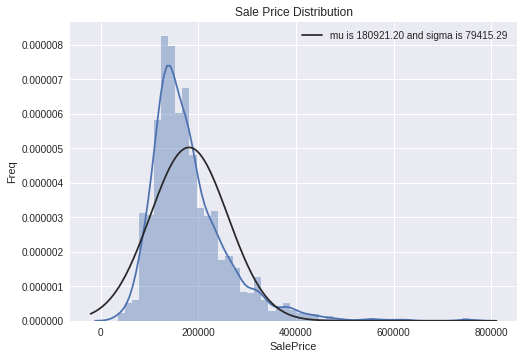

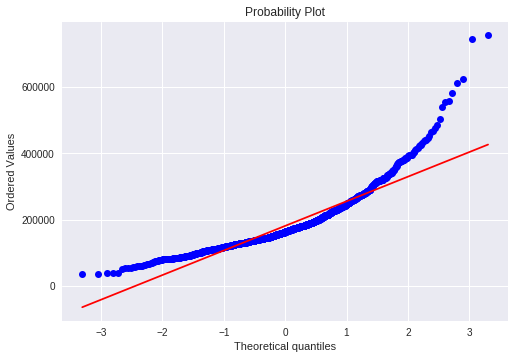

skew is 1.88


In [7]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df_train.SalePrice, fit=norm)
mu, sigma =norm.fit(df_train.SalePrice)

plt.legend(['mu is {0:.2f} and sigma is {1:.2f}'.format(mu, sigma)], loc='best')
plt.ylabel('Freq')
plt.title('Sale Price Distribution')

fig =plt.figure()
res =stats.probplot(df_train.SalePrice, plot=plt)
plt.show()
print('skew is {0:.2f}'.format(df_train.SalePrice.skew()))

Skewed normal distribution, usually heavy tail gaussian distribution can be transform with log to get better normality.

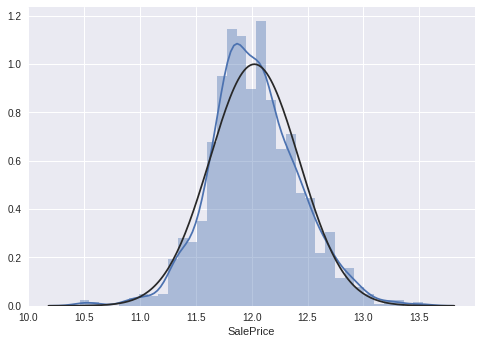

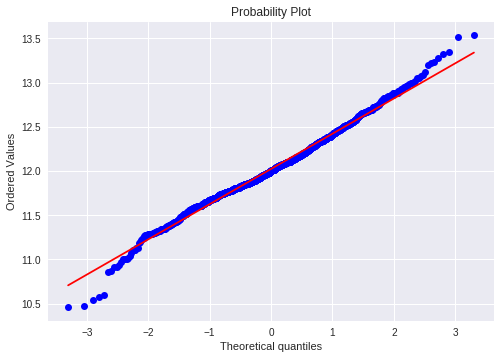

log1p transformed skew is 0.12


In [8]:
df_train['SalePrice'] =np.log1p(df_train['SalePrice'])

sns.distplot(df_train.SalePrice, fit=norm)
log_mu, log_sigma =norm.fit(df_train.SalePrice)

fig =plt.figure()
res =stats.probplot(df_train.SalePrice, plot=plt)
plt.show()
print('log1p transformed skew is {0:.2f}'.format(df_train.SalePrice.skew()))

Much better, now I will need to remember inverse the final prediction from log1p to regular
with np.expm1()

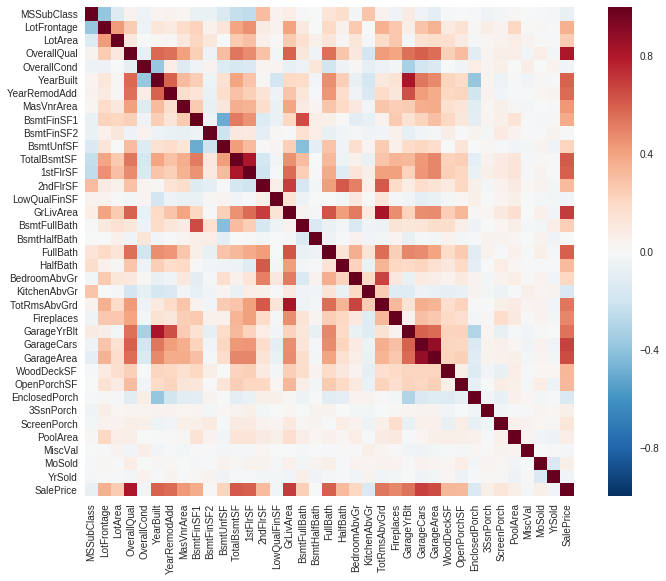

In [9]:
corrmat =df_train.corr()
fig, ax =plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True)

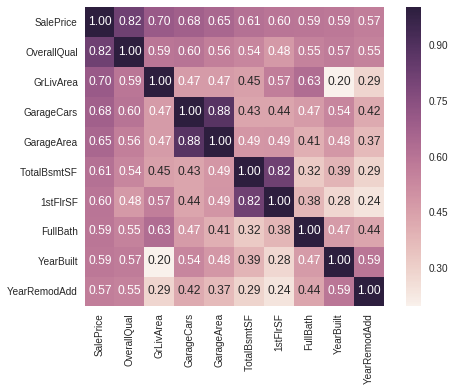

In [10]:
#dive deeper in correlation matrix with sale price
k =10
cols =corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm =np.corrcoef(df_train[cols].values.T)

sns.set()
hm =sns.heatmap(cm, annot=True, square=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)
plt.show()

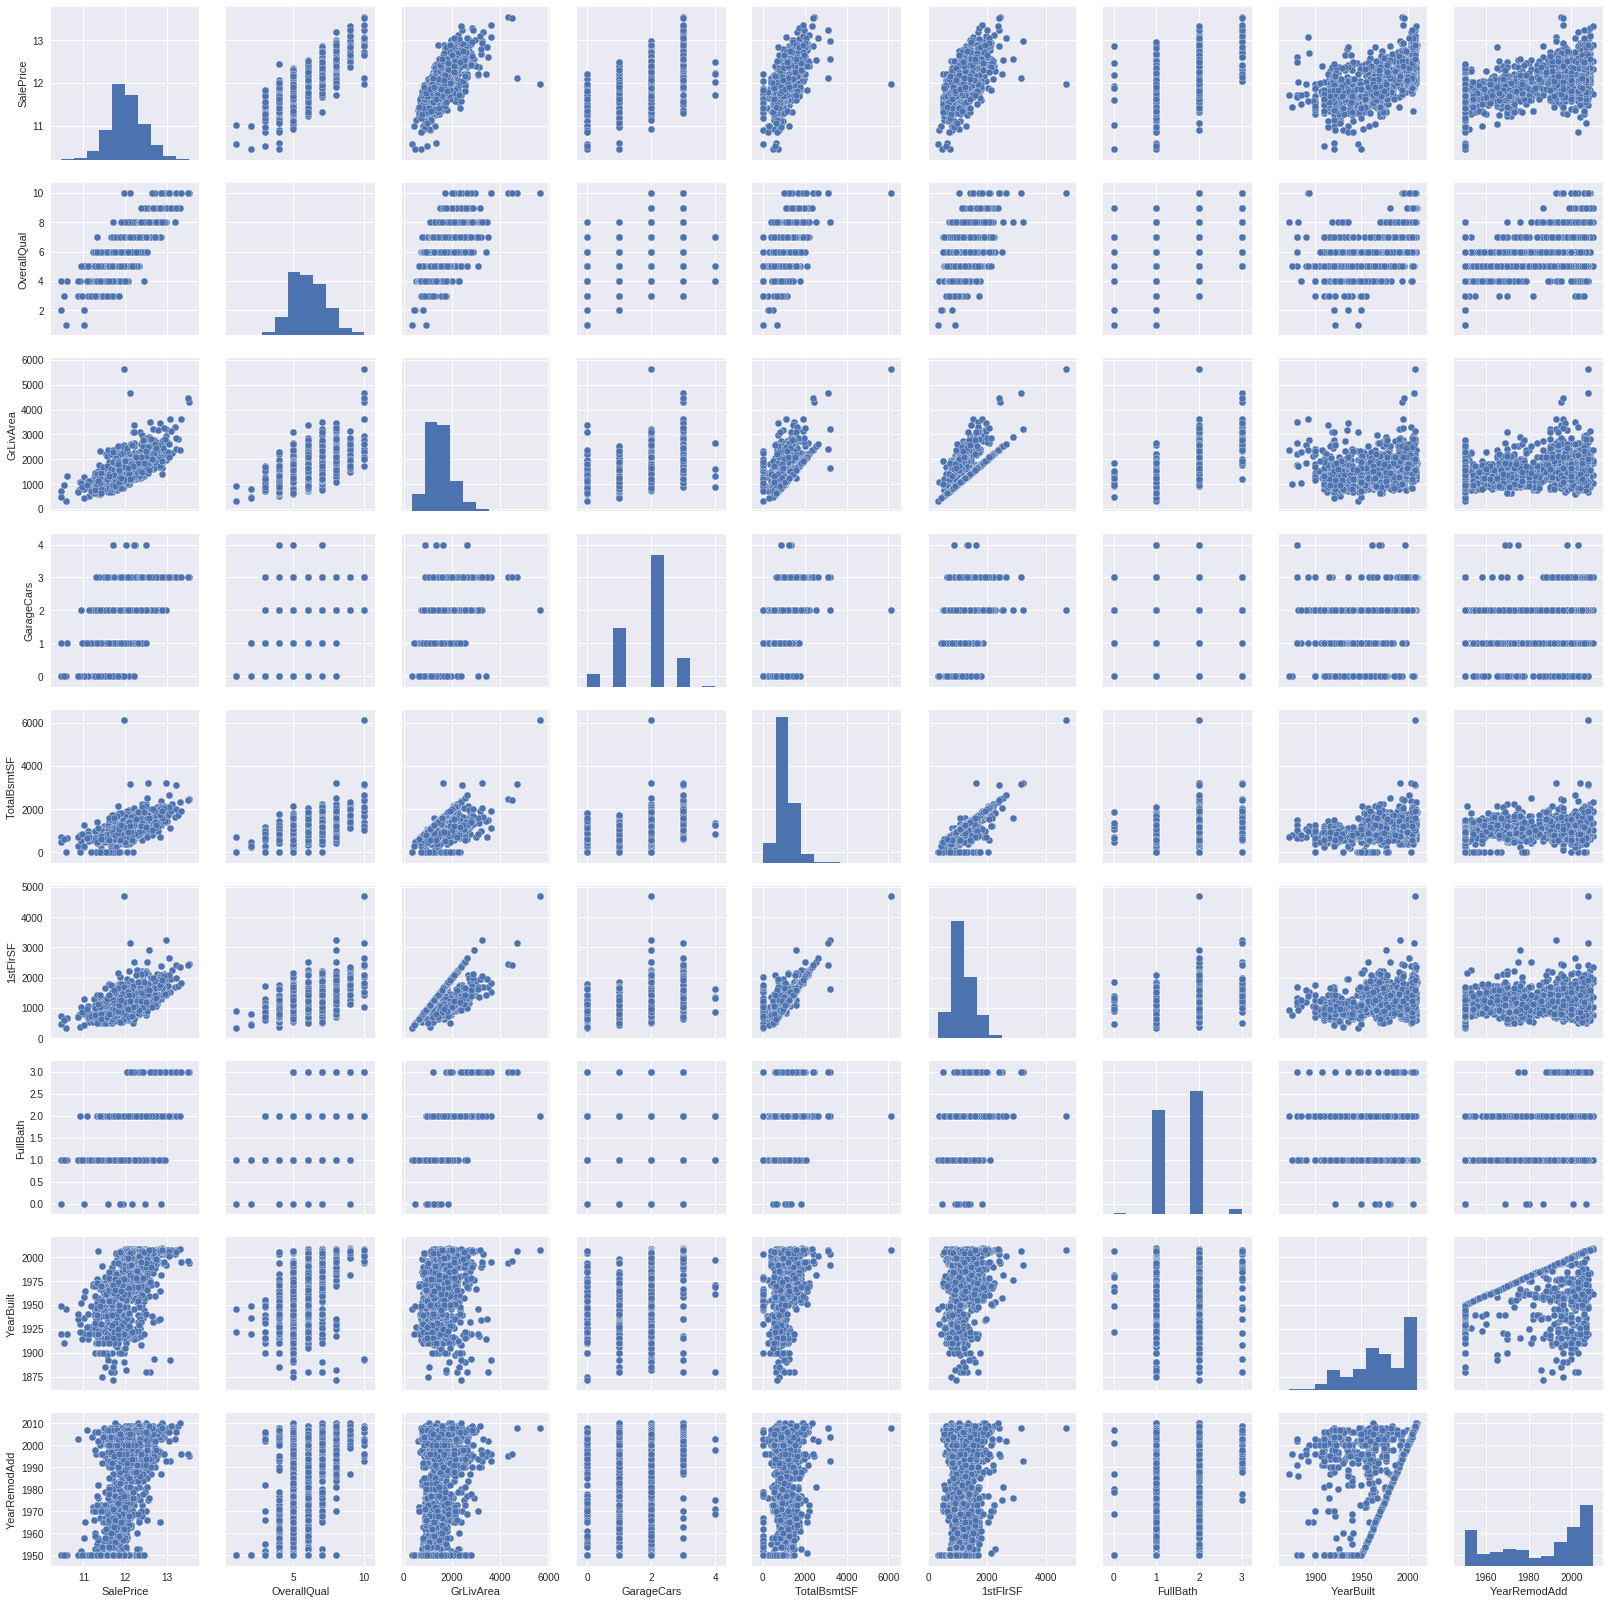

In [11]:
col =['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
     '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

sns.set()
sns.pairplot(df_train[col], size=2.5)
plt.show()

hmm.. some outliers are showing, we might need to remove them later.  The easiest and most popular technique is IQR

In [12]:
missing =df_train.isnull().sum().sort_values(ascending=False)
per_missing =(df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
missing_data =pd.concat([missing, per_missing], axis=1, keys=['count', 'percent'])
missing_data

,count,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [13]:
for col in missing_data.index:
  print(col,df_train[col].unique())

PoolQC [nan 'Ex' 'Fa' 'Gd']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley [nan 'Grvl' 'Pave']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1

wow! so the top 4 has >80% missing data, might as well delete the column

In [14]:
col1 =missing_data.nlargest(4, 'percent').index
col1

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [15]:
df_train =df_train.drop(col1, axis=1)
df_test =df_test.drop(col1, axis=1)

print(df_train.shape, df_test.shape)

(1460, 76) (1459, 75)


In [16]:
df_train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [0]:
df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0], inplace=True)
df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0], inplace=True)

In [0]:
df_train['LotFrontage'] =df_train.groupby(by=['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
df_test['LotFrontage'] =df_test.groupby(by=['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [0]:
list1 = ['BsmtExposure', 'BsmtQual', 'BsmtCond', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'MasVnrType', 'Electrical']

for a in list1:
  df_train[a].fillna(df_train[a].mode()[0], inplace=True)
  df_test[a].fillna(df_test[a].mode()[0], inplace=True)

In [0]:
list3 =['MSZoning', 'Functional', 'Utilities', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2',
       'GarageArea', 'SaleType', 'BsmtUnfSF', 'TotalBsmtSF', 'Exterior1st','BsmtFinSF1',
       'Exterior2nd', 'KitchenQual', 'GarageCars']

for c in list3:
  df_test[c].fillna(df_test[c].mode()[0], inplace=True)

In [0]:
df_train['BsmtFinType1'].fillna('None', inplace=True)
df_train['BsmtFinType2'].fillna('None', inplace=True)

df_test['BsmtFinType1'].fillna('None', inplace=True)
df_test['BsmtFinType2'].fillna('None', inplace=True)

In [0]:
list2 =['GarageYrBlt', 'MasVnrArea']
for b in list2:
  df_train[b].fillna(df_train[b].mean(), inplace=True)
  df_test[b].fillna(df_test[b].mean(), inplace=True)

In [23]:
df_train.isnull().sum().sort_values(ascending=False)

SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
SaleCondition    0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
                ..
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageFinish     0
GarageType       0
CentralAir       0
FireplaceQu      0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath    

In [24]:
df_test.isnull().sum().sort_values(ascending=False)

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
RoofStyle        0
YearBuilt        0
TotalBsmtSF      0
OverallCond      0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
                ..
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
GarageYrBlt      0
FireplaceQu      0
HeatingQC        0
Fireplaces       0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath

No missing values

In [25]:
# Transforming ordinal data to numeric values
df_category =df_train.select_dtypes(include='object')
df_category.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


Let's check to see whether there is anything outside of ('Gd', 'TA'..) for ordinal value


In [26]:
for c in df_category:
  print(c, df_category[c].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [0]:
df_train =df_train.replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'N':0, 'Y':1,'P':1})
df_train =df_train.replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_train['BsmtExposure'] =df_train['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 4:3})
df_train['Utilities'] =df_train['Utilities'].map({'AllPub':1, 'NoSeWa':0})

In [0]:
df_test =df_test.replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'N':0, 'Y':1,'P':1})
df_test =df_test.replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_test['BsmtExposure'] =df_test['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 4:3})
df_test['Utilities'] =df_test['Utilities'].map({'AllPub':1, 'NoSeWa':0})

In [29]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,1,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
2,20,RL,80.0,9600,Pave,Reg,Lvl,1,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
3,60,RL,68.0,11250,Pave,IR1,Lvl,1,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
4,70,RL,60.0,9550,Pave,IR1,Lvl,1,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
5,60,RL,84.0,14260,Pave,IR1,Lvl,1,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


In [0]:
df_train['House_age']= 2019-df_train['YearBuilt']
df_train['Since_remodel'] =2019-df_train['YearRemodAdd']

df_test['House_age']= 2019-df_test['YearBuilt']
df_test['Since_remodel'] =2019-df_test['YearRemodAdd']

In [0]:
df_train.drop(['YearBuilt', 'YearRemodAdd'],axis=1)
df_test.drop(['YearBuilt', 'YearRemodAdd'],axis=1)

In [34]:
#now we are ready to transform categorical data, usually we can use pandas get_dummies or sklearn OneHotencoder
#i use get_dummies because #teampandas

df_train =pd.get_dummies(df_train)
df_test =pd.get_dummies(df_test)

print(df_train.shape, df_test.shape)

(1460, 229) (1459, 214)


In [35]:
list4 =

TypeError: ignored